5.2.1

In [1]:
import numpy as np
from scipy.stats import skewnorm, kruskal, mannwhitneyu

In [2]:
np.random.seed(99)

group_a = skewnorm.rvs(a=9, scale=2.2, size=99) + 4.5
group_b = skewnorm.rvs(a=11, scale=1, size=99) + 4.6

H = kruskal(group_a, group_b)
U = mannwhitneyu(group_a, group_b)

print(f"Kruskal-Wallis Test, H={H[0]}, p={H[1]}")
print(f"Mann-Whitney U-test, U={U[0]}, p={U[1]}")

Kruskal-Wallis Test, H=16.03739696339062, p=6.210361918022316e-05
Mann-Whitney U-test, U=6515.0, p=6.243023806252358e-05


In [1]:
import numpy as np
from scipy import stats as st
import scikit_posthocs as sp

np.random.seed(99)

group_a = st.skewnorm.rvs(a=9, scale=2.2, size=99) + 4.6
group_b = st.skewnorm.rvs(a=11, scale=1.5, size=99) + 4.6
group_c = st.skewnorm.rvs(a=9.1, scale=2.0, size=99) + 4.6


data = [group_a, group_b, group_c]
H = st.kruskal(group_a, group_b)
post_hoc = sp.posthoc_dunn(data, p_adjust="bonferroni")

print(f"Kruskall-Wallis Test, H={H[0]}, p={H[1]}")
print(post_hoc)

Kruskall-Wallis Test, H=3.3283051314115255, p=0.06809701406173653
          1         2         3
1  1.000000  0.230991  0.494148
2  0.230991  1.000000  1.000000
3  0.494148  1.000000  1.000000


5.2.2

In [6]:
import pandas as pd
import scipy.stats as st

assignments = pd.read_csv("../datasets/assignments.csv", index_col="recommender")

chi_sq = st.chi2_contingency(assignments)

print(f"Chi-square value: {chi_sq[0].round(3)}")
print(f"p-value: {chi_sq[1].round(3)}")
print(f"Expected Frequencies:\n {chi_sq[3].round(2)}")

Chi-square value: 6.73
p-value: 0.875
Expected Frequencies:
 [[ 442.61  440.88  425.28  424.24 1733.  ]
 [ 392.55  391.01  377.18  376.26 1537.  ]
 [ 441.84  440.11  424.54  423.5  1730.  ]
 [1277.   1272.   1227.   1224.   5000.  ]]


In [7]:
expected = assignments * .2596
print(expected.round(2))

             Canada  England  France  United States    Total
recommender                                                 
A            107.73   115.00  114.48         112.67   449.89
B            102.54    99.95   94.75         101.76   399.01
C            121.23   115.26  109.29         103.32   449.11
Total        331.51   330.21  318.53         317.75  1298.00


In [8]:
clicked = pd.read_csv("../datasets/clicked.csv", index_col="recommender")

chi_sq = st.chi2_contingency(clicked, expected)

print(f"Chi-square value: {chi_sq[0].round(3)}")
print(f"p-value: {chi_sq[1].round(3)}")


Chi-square value: 22.994
p-value: 0.028


Text(50.722222222222214, 0.5, 'Recommender Version')

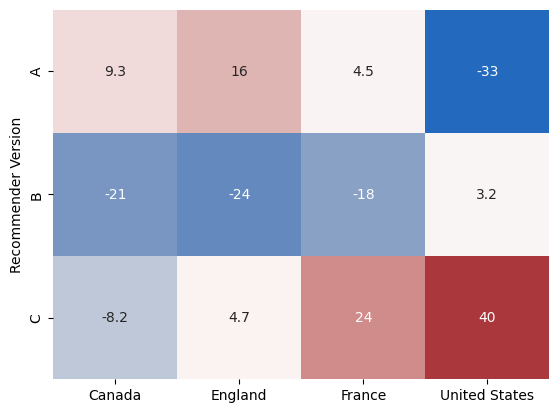

In [9]:
import seaborn as sns
from operator import sub
import matplotlib.pyplot as plt

diffs = list(map(sub, clicked.values, expected.values))
diffs = pd.DataFrame(
    diffs, 
    columns = assignments.columns,
    index = assignments.index,
)
sns.heatmap(
    diffs.iloc[:-1, :-1],
    cmap="vlag",
    annot=True,
    cbar=False,
)
plt.xlabel("")
plt.ylabel("Recommender Version")

In [10]:
clicked.T

recommender,A,B,C,Total
Canada,117,82,113,312
England,131,76,120,327
France,119,77,133,329
United States,80,105,143,328
Total,447,340,509,1296


In [12]:
from itertools import combinations

pairs = list(combinations(assignments.iloc[:-1, :-1].index, 2))
chisq_values = []
p_values = []

for p in pairs:
    c = clicked[(clicked.index == p[0]) | (clicked.index == p[1])]
    chi2, pv, dof, exp = st.chi2_contingency(c, correction=True)
    chisq_values.append(chi2)
    p_values.append(pv)
    print(p, ", Chi-square =", chi2.round(3), ", p=", pv.round(3))

('A', 'B') , Chi-square = 18.95 , p= 0.001
('A', 'C') , Chi-square = 15.171 , p= 0.004
('B', 'C') , Chi-square = 2.0 , p= 0.736


5.3

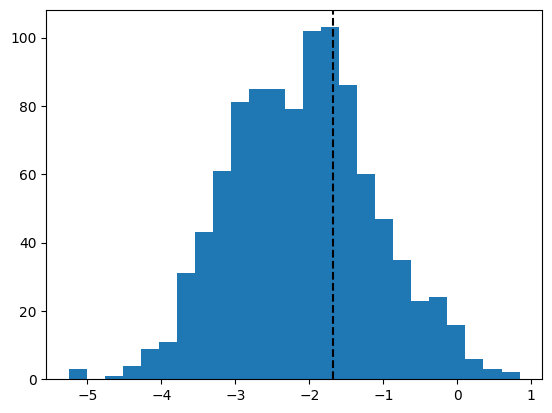

In [16]:
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

np.random.seed(99)

X1 = np.random.normal(loc=75.5, scale=6.2, size=500)
X2 = np.random.normal(loc=76.2, scale=6.5, size=500)

def t_stat(X1, X2):
    return st.ttest_ind(X1, X2)[0]

result = st.bootstrap(
    (X1, X2),
    t_stat,
    n_resamples=1000,
    batch=50,
    method="basic",
    vectorized=False,
    random_state=99,
)

t_crit = -st.t.ppf(q=0.95, df=49)

plt.hist(result.bootstrap_distribution, bins=25)
plt.axvline(t_crit, color="black", linestyle="dashed")

Activity 1

In [3]:
import numpy as np
from scipy import stats as st

np.random.seed(99)

x_a = np.random.normal(loc=47, scale=4, size=55)
x_b = np.random.normal(loc=53, scale=4, size=65)

X1 = np.concatenate([x_a, x_b])
X2 = st.skewnorm.rvs(83, size=120) + 51
X3 = np.random.exponential(scale=10, size=79) + 44



In [4]:
H = st.kruskal(X1, X2, X3)
print(H)

KruskalResult(statistic=np.float64(5.8782865139279465), pvalue=np.float64(0.052911040490784))
